In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('insurance_churn.csv')

# Configure plot styles for better visibility
sns.set_theme(style="whitegrid")
print("Libraries imported and data loaded.")

ModuleNotFoundError: No module named 'seaborn'

In [3]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('insurance_churn.csv')

# Set visual style
sns.set_theme(style="whitegrid")
print("Data loaded successfully!")
df.head()

Data loaded successfully!


,customer_id,age,gender,tenure_months,monthly_premium,past_claims_count,missed_payments_12m,risk_score,churn_flag
0,CUST_001672,70,Female,178,222.37,0,1,70.0,0
1,CUST_007800,53,Female,139,746.88,2,0,74.0,0
2,CUST_002614,32,Female,205,1282.70,2,1,42.0,0
3,CUST_003411,24,Female,4,2210.51,1,1,61.0,1
4,CUST_010302,26,Male,143,1654.00,1,1,48.0,0


In [5]:
print("--- Column Information ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Statistical Summary ---")
df.describe()

--- Column Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          1000 non-null   object 
 1   age                  1000 non-null   int64  
 2   gender               1000 non-null   object 
 3   tenure_months        1000 non-null   int64  
 4   monthly_premium      1000 non-null   float64
 5   past_claims_count    1000 non-null   int64  
 6   missed_payments_12m  1000 non-null   int64  
 7   risk_score           1000 non-null   float64
 8   churn_flag           1000 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 70.4+ KB

--- Missing Values ---
customer_id            0
age                    0
gender                 0
tenure_months          0
monthly_premium        0
past_claims_count      0
missed_payments_12m    0
risk_score             0
churn_flag             0
dtype:

,age,tenure_months,monthly_premium,past_claims_count,missed_payments_12m,risk_score,churn_flag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,46.804000,121.097000,1453.767490,0.972000,0.820000,58.008000,0.316000
std,16.457352,69.020166,888.802471,0.965478,0.901339,11.681369,0.465146
min,18.000000,1.000000,75.410000,0.000000,0.000000,30.000000,0.000000
25%,33.000000,60.000000,706.900000,0.000000,0.000000,50.000000,0.000000
50%,47.000000,122.000000,1390.200000,1.000000,1.000000,58.000000,0.000000
75%,61.000000,181.250000,2030.420000,2.000000,1.000000,66.000000,1.000000
max,74.000000,239.000000,4610.950000,5.000000,4.000000,86.000000,1.000000


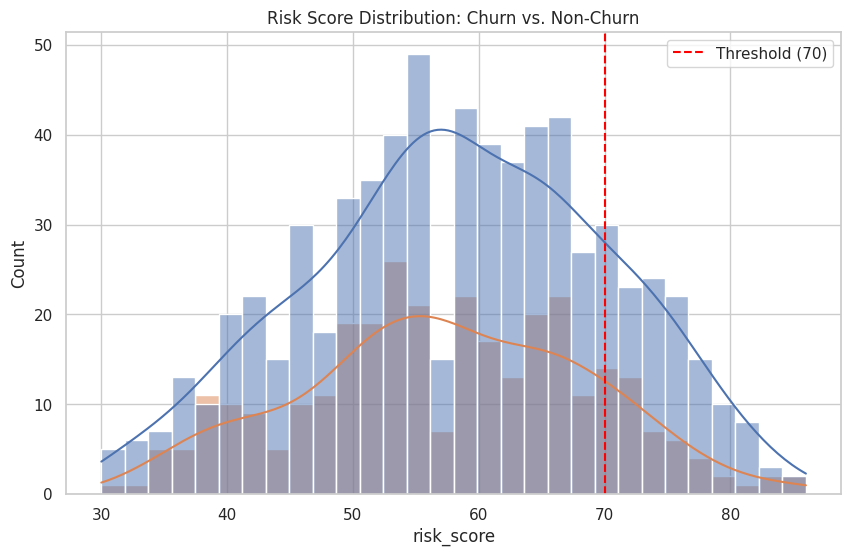

In [6]:
plt.figure(figsize=(10, 6))
# Histogram of risk scores colored by churn status
sns.histplot(data=df, x='risk_score', hue='churn_flag', kde=True, bins=30)

# Vertical line at your threshold
plt.axvline(70, color='red', linestyle='--', label='Threshold (70)')
plt.title('Risk Score Distribution: Churn vs. Non-Churn')
plt.legend()
plt.show()

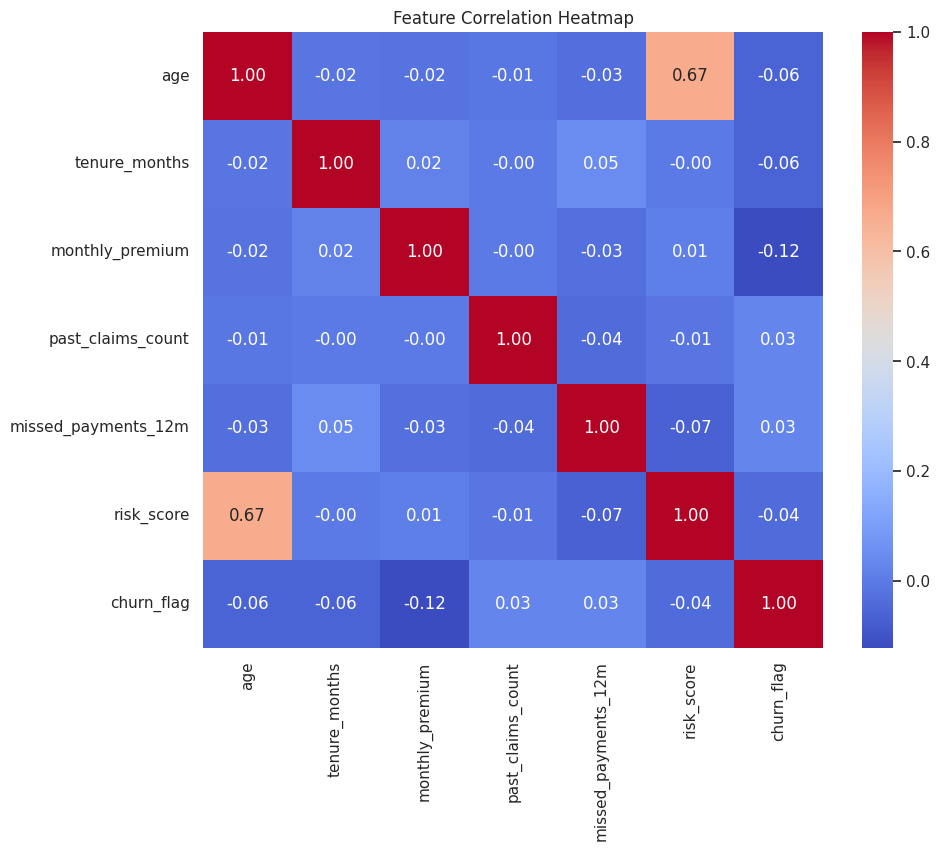

In [7]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

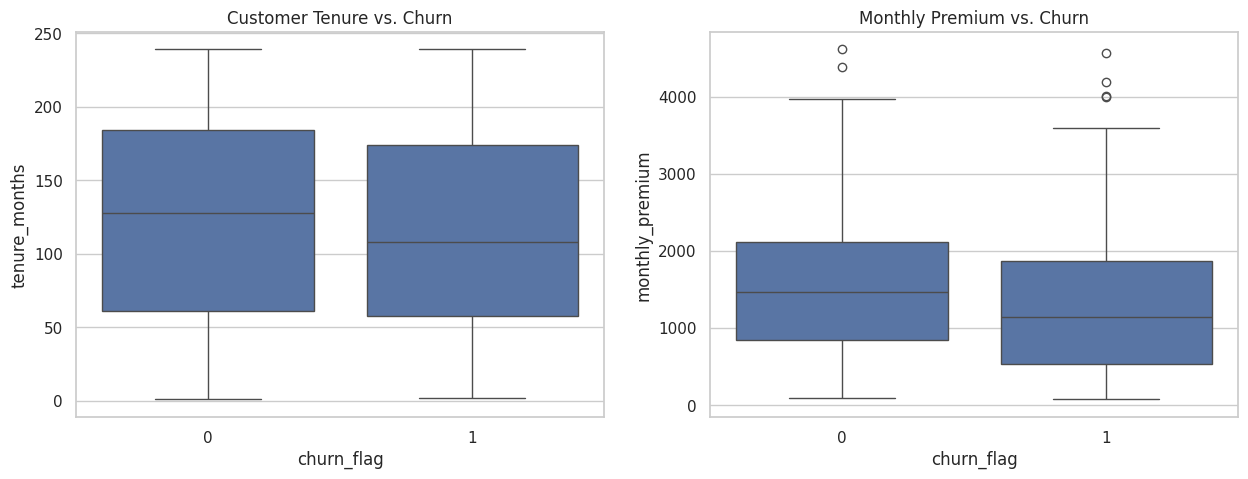

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Tenure vs Churn
sns.boxplot(ax=axes[0], x='churn_flag', y='tenure_months', data=df)
axes[0].set_title('Customer Tenure vs. Churn')

# Monthly Premium vs Churn
sns.boxplot(ax=axes[1], x='churn_flag', y='monthly_premium', data=df)
axes[1].set_title('Monthly Premium vs. Churn')

plt.show()

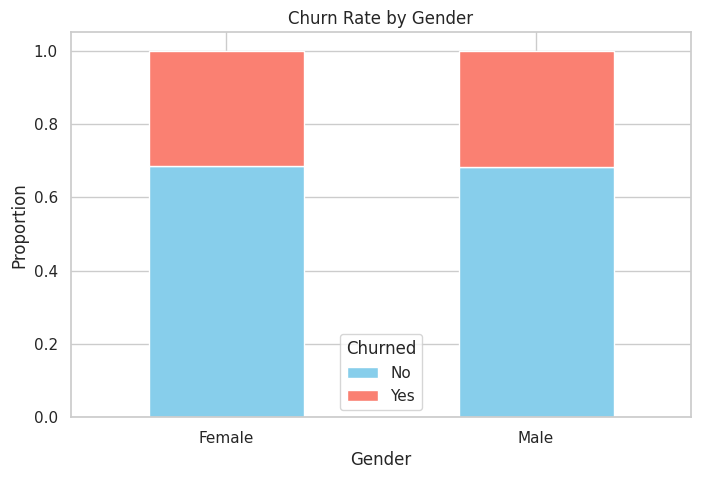

In [9]:
# Churn rate by Gender
gender_plot = pd.crosstab(df['gender'], df['churn_flag'], normalize='index')
gender_plot.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8,5))

plt.title('Churn Rate by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Churned', labels=['No', 'Yes'])
plt.show()

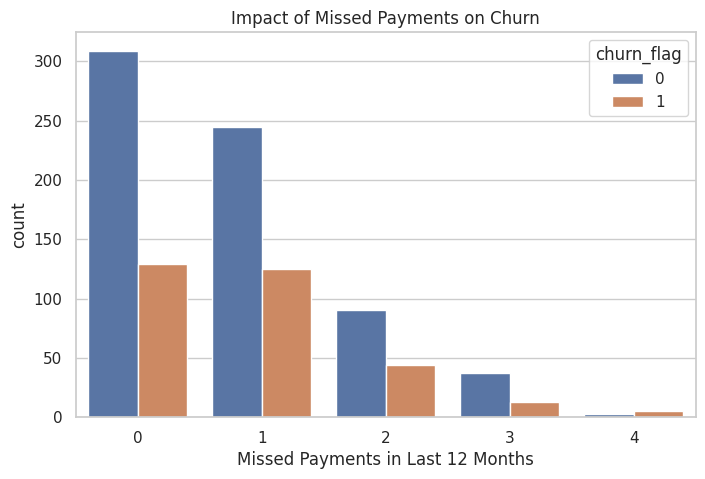

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='missed_payments_12m', hue='churn_flag')
plt.title('Impact of Missed Payments on Churn')
plt.xlabel('Missed Payments in Last 12 Months')
plt.show()

In [13]:
import shutil
import os

folder = 'outputs'

if os.path.exists(folder):
    # Remove the folder and all its contents
    shutil.rmtree(folder)
    # Re-create the empty folder
    os.makedirs(folder)
    print(f"✅ All files in '{folder}' have been deleted.")
else:
    os.makedirs(folder)
    print(f"Created new '{folder}' folder.")

✅ All files in 'outputs' have been deleted.


In [14]:
from azure.ai.ml import MLClient
from azure.ai.ml.entities import Model
from azure.ai.ml.constants import AssetTypes
from azure.identity import DefaultAzureCredential

# 1. Connect to Azure ML
ml_client = MLClient.from_config(DefaultAzureCredential())

# 2. Register the 'tuned_balanced_model.pkl' you just created
run_model = Model(
    path="outputs/tuned_balanced_model.pkl", 
    name="insurance-churn-model",
    version="1",
    description="Balanced Random Forest with n_estimators=300, depth=4",
    type=AssetTypes.CUSTOM_MODEL
)

print("Registering model in Azure ML...")
ml_client.models.create_or_update(run_model)
print(" Model registered! You can now see it in the 'Models' tab.")

Found the config file in: /config.json
Class DeploymentTemplateOperations: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Uploading tuned_balanced_model.pkl (< 1 MB): 100%|██████████| 3.84M/3.84M [00:00<00:00, 31.8MB/s]




Registering model in Azure ML...
 Model registered! You can now see it in the 'Models' tab.
